In [3]:
# Importing the Keras libraries and packages

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
image_shape=(224,224,3)

In [4]:
# Input parameter
train_data_dir ='/media/poornima/Local Disk 800GB/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (2)/Train'
val_data_dir ='/media/poornima/Local Disk 800GB/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (2)/Test'
model_weights_file = '/media/poornima/Local Disk 800GB/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (2)/Signature_Recognition_GDPS_SGD_Novel-FINAL.hdf5'
nb_epochs = 200
print("Input parameters are assigned")



Input parameters are assigned


In [5]:
SIGNATURE_CLASSES = ['001', '002', '003','004','005','006','007','008','009','010','011','012','013','014','015','016','017','018','019','020','021','022','023','024','025','026','027','028','029','030','031','032','033','034','035','036','037','038','039','040','041','042','043','044','045','046','047','048','049','050','051','052','053','054','055',
                     '056','057','058','059','060','061','062','063','064','065','066','067','068','069', '070','071','072','073','074','075','076','077','078','079', '080','081','082','083','084','085','086','087','088','089', '090', '091','092','093','094','095','096','097','098','099', '100','101' ,'102' ,'103' ,'104' ,'105' ,'106' ,'107' ,'108' ,'109' ,'110' ,'111' ,'112' ,'113' ,'114' ,'115' ,'116' ,'117' ,'118' ,'119' ,'120' ,'121' ,'122' ,'123' ,'124' ,'125' ,'126' ,'127' ,'128' ,'129' ,'130' ,'131' ,'132' ,'133' ,'134' ,'135' ,'136' ,'137' ,'138' ,'139' ,'140' ,'141' ,'142' ,'143' ,'144' ,'145' ,'146' ,'147' ,'148' ,'149' ,'150' ,'151' ,'152' ,'153' ,'154' ,'155' ,'156' ,'157' ,'158' ,'159' ,'160' ,'161' ,'162' ,'163' ,'164' ,'165' ,'166' ,'167' ,'168' ,'169' ,'170' ,'171' ,'172' ,'173' ,'174' ,'175' ,'176' ,'177' ,'178' ,'179' ,'180' ,'181' ,'182' ,'183' ,'184' ,'185' ,'186' ,'187' ,'188' ,'189' ,'190' ,'191' ,'192' ,'193' ,'194' ,'195' ,'196' ,'197' ,'198' ,'199' ,'200' ,'201' ,'202' ,'203' ,'204' ,'205' ,'206' ,'207' ,'208' ,'209' ,'210' ,'211' ,'212' ,'213' ,'214' ,'215' ,'216' ,'217' ,'218' ,'219' ,'220' ,'221' ,'222' ,'223' ,'224' ,'225' ,'226' ,'227' ,'228' ,'229' ,'230' ,'231' ,'232' ,'233' ,'234' ,'235' ,'236' ,'237' ,'238' ,'239' ,'240' ,'241' ,'242' ,'243' ,'244' ,'245' ,'246' ,'247' ,'248' ,'249' ,'250' ,'251' ,'252' ,'253' ,'254' ,'255' ,'256' ,'257' ,'258' ,'259' ,'260' ,'261' ,'262' ,'263' ,'264' ,'265' ,'266' ,'267' ,'268' ,'269' ,'270' ,'271' ,'272' ,'273' ,'274' ,'275' ,'276' ,'277' ,'278' ,'279' ,'280' ,'281' ,'282' ,'283' ,'284' ,'285' ,'286' ,'287' ,'288' ,'289' ,'290' ,'291' ,'292' ,'293' ,'294' ,'295' ,'296' ,'297' ,'298' ,'299' ,'300' ,'301' ,'302' ,'303' ,'304' ,'305' ,'306' ,'307' ,'308' ,'309' ,'310' ,'311' ,'312' ,'313' ,'314' ,'315' ,'316' ,'317' ,'318' ,'319' ,'320' ,'321' ,'322' ,'323' ,'324' ,'325' ,'326' ,'327' ,'328' ,'329' ,'330' ,'331' ,'332' ,'333' ,'334' ,'335' ,'336' ,'337' ,'338' ,'339' ,'340' ,'341' ,'342' ,'343' ,'344' ,'345' ,'346' ,'347' ,'348' ,'349' ,'350' ,'351' ,'352' ,'353' ,'354' ,'355' ,'356' ,'357' ,'358' ,'359' ,'360' ,'361' ,'362' ,'363' ,'364' ,'365' ,'366' ,'367' ,'368' ,'369' ,'370' ,'371' ,'372' ,'373' ,'374' ,'375' ,'376' ,'377' ,'378' ,'379' ,'380' ,'381' ,'382' ,'383' ,'384' ,'385' ,'386' ,'387' ,'388' ,'389' ,'390' ,'391' ,'392' ,'393' ,'394' ,'395' ,'396' ,'397' ,'398' ,'399' ,'400' ,'401' ,'402' ,'403' ,'404' ,'405' ,'406' ,'407' ,'408' ,'409' ,'410' ,'411' ,'412' ,'413' ,'414' ,'415' ,'416' ,'417' ,'418' ,'419' ,'420' ,'421' ,'422' ,'423' ,'424' ,'425' ,'426' ,'427' ,'428' ,'429' ,'430' ,'431' ,'432' ,'433' ,'434' ,'435' ,'436' ,'437' ,'438' ,'439' ,'440' ,'441' ,'442' ,'443' ,'444' ,'445' ,'446' ,'447' ,'448' ,'449' ,'450' ,'451' ,'452' ,'453' ,'454' ,'455' ,'456' ,'457' ,'458' ,'459' ,'460' ,'461' ,'462' ,'463' ,'464' ,'465' ,'466' ,'467' ,'468' ,'469' ,'470' ,'471' ,'472' ,'473' ,'474' ,'475' ,'476' ,'477' ,'478' ,'479' ,'480' ,'481' ,'482' ,'483' ,'484' ,'485' ,'486' ,'487' ,'488' ,'489' ,'490' ,'491' ,'492' ,'493' ,'494' ,'495' ,'496' ,'497' ,'498' ,'499' ,'500' ,'501' ,'502' ,'503' ,'504' ,'505' ,'506' ,'507' ,'508' ,'509' ,'510' ,'511' ,'512' ,'513' ,'514' ,'515' ,'516' ,'517' ,'518' ,'519' ,'520' ,'521' ,'522' ,'523' ,'524' ,'525' ,'526' ,'527' ,'528' ,'529' ,'530' ,'531' ,'532' ,'533' ,'534' ,'535' ,'536' ,'537' ,'538' ,'539' ,'540' ,'541' ,'542' ,'543' ,'544' ,'545' ,'546' ,'547' ,'548' ,'549' ,'550' ,'551' ,'552' ,'553' ,'554' ,'555' ,'556' ,'557' ,'558' ,'559' ,'560' ,'561' ,'562' ,'563' ,'564' ,'565' ,'566' ,'567' ,'568' ,'569' ,'570' ,'571' ,'572' ,'573' ,'574' ,'575' ,'576' ,'577' ,'578' ,'579' ,'580' ,'581' ,'582' ,'583' ,'584' ,'585' ,'586' ,'587' ,'588' ,'589' ,'590' ,'591' ,'592' ,'593' ,'594' ,'595' ,'596' ,'597' ,'598' ,'599' ,'600' ,'601' ,'602' ,'603' ,'604' ,'605' ,'606' ,'607' ,'608' ,'609' ,'610' ,'611' ,'612' ,'613' ,'614' ,'615' ,'616' ,'617' ,'618' ,'619' ,'620' ,'621' ,'622' ,'623' ,'624' ,'625' ,'626' ,'627' ,'628' ,'629' ,'630' ,'631' ,'632' ,'633' ,'634' ,'635' ,'636' ,'637' ,'638' ,'639' ,'640' ,'641' ,'642' ,'643' ,'644' ,'645' ,'646' ,'647' ,'648' ,'649' ,'650' ,'651' ,'652' ,'653' ,'654' ,'655' ,'656' ,'657' ,'658' ,'659' ,'660' ,'661' ,'662' ,'663' ,'664' ,'665' ,'666' ,'667' ,'668' ,'669' ,'670' ,'671' ,'672' ,'673' ,'674' ,'675' ,'676' ,'677' ,'678' ,'679' ,'680' ,'681' ,'682' ,'683' ,'684' ,'685' ,'686' ,'687' ,'688' ,'689' ,'690' ,'691' ,'692' ,'693' ,'694' ,'695' ,'696' ,'697' ,'698' ,'699' ,'700' ,'701' ,'702' ,'703' ,'704' ,'705' ,'706' ,'707' ,'708' ,'709' ,'710' ,'711' ,'712' ,'713' ,'714' ,'715' ,'716' ,'717' ,'718' ,'719' ,'720' ,'721' ,'722' ,'723' ,'724' ,'725' ,'726' ,'727' ,'728' ,'729' ,'730' ,'731' ,'732' ,'733' ,'734' ,'735' ,'736' ,'737' ,'738' ,'739' ,'740' ,'741' ,'742' ,'743' ,'744' ,'745' ,'746' ,'747' ,'748' ,'749' ,'750' ,'751' ,'752' ,'753' ,'754' ,'755' ,'756' ,'757' ,'758' ,'759' ,'760' ,'761' ,'762' ,'763' ,'764' ,'765' ,'766' ,'767' ,'768' ,'769' ,'770' ,'771' ,'772' ,'773' ,'774' ,'775' ,'776' ,'777' ,'778' ,'779' ,'780' ,'781' ,'782' ,'783' ,'784' ,'785' ,'786' ,'787' ,'788' ,'789' ,'790' ,'791' ,'792' ,'793' ,'794' ,'795' ,'796' ,'797' ,'798' ,'799' ,'800' ,'801' ,'802' ,'803' ,'804' ,'805' ,'806' ,'807' ,'808' ,'809' ,'810' ,'811' ,'812' ,'813' ,'814' ,'815' ,'816' ,'817' ,'818' ,'819' ,'820' ,'821' ,'822' ,'823' ,'824' ,'825' ,'826' ,'827' ,'828' ,'829' ,'830' ,'831' ,'832' ,'833' ,'834' ,'835' ,'836' ,'837' ,'838' ,'839' ,'840' ,'841' ,'842' ,'843' ,'844' ,'845' ,'846' ,'847' ,'848' ,'849' ,'850' ,'851' ,'852' ,'853' ,'854' ,'855' ,'856' ,'857' ,'858' ,'859' ,'860' ,'861' ,'862' ,'863' ,'864' ,'865' ,'866' ,'867' ,'868' ,'869' ,'870' ,'871' ,'872' ,'873' ,'874' ,'875' ,'876' ,'877' ,'878' ,'879' ,'880' ,'881' ,'882' ,'883' ,'884' ,'885' ,'886' ,'887' ,'888' ,'889' ,'890' ,'891' ,'892' ,'893' ,'894' ,'895' ,'896' ,'897' ,'898' ,'899' ,'900' ,'901' ,'902' ,'903' ,'904' ,'905' ,'906' ,'907' ,'908' ,'909' ,'910' ,'911' ,'912' ,'913' ,'914' ,'915' ,'916' ,'917' ,'918' ,'919' ,'920' ,'921' ,'922' ,'923' ,'924' ,'925' ,'926' ,'927' ,'928' ,'929' ,'930' ,'931' ,'932' ,'933' ,'934' ,'935' ,'936' ,'937' ,'938' ,'939' ,'940' ,'941' ,'942' ,'943' ,'944' ,'945' ,'946' ,'947' ,'948' ,'949' ,'950' ,'951' ,'952' ,'953' ,'954' ,'955' ,'956' ,'957' ,'958' ,'959' ,'960' ,'961' ,'962' ,'963' ,'964' ,'965' ,'966' ,'967' ,'968' ,'969' ,'970' ,'971' ,'972' ,'973' ,'974' ,'975' ,'976' ,'977' ,'978' ,'979' ,'980' ,'981' ,'982' ,'983' ,'984' ,'985' ,'986' ,'987' ,'988' ,'989' ,'990' ,'991' ,'992' ,'993' ,'994' ,'995' ,'996' ,'997' ,'998' ,'999' ,'1000' ,'1001' ,'1002' ,'1003' ,'1004' ,'1005' ,'1006' ,'1007' ,'1008' ,'1009' ,'1010' ,'1011' ,'1012' ,'1013' ,'1014' ,'1015' ,'1016' ,'1017' ,'1018' ,'1019' ,'1020' ,'1021' ,'1022' ,'1023' ,'1024' ,'1025' ,'1026' ,'1027' ,'1028' ,'1029' ,'1030' ,'1031' ,'1032' ,'1033' ,'1034' ,'1035' ,'1036' ,'1037' ,'1038' ,'1039' ,'1040' ,'1041' ,'1042' ,'1043' ,'1044' ,'1045' ,'1046' ,'1047' ,'1048' ,'1049' ,'1050' ,'1051' ,'1052' ,'1053' ,'1054' ,'1055' ,'1056' ,'1057' ,'1058' ,'1059' ,'1060' ,'1061' ,'1062' ,'1063' ,'1064' ,'1065' ,'1066' ,'1067' ,'1068' ,'1069' ,'1070' ,'1071' ,'1072' ,'1073' ,'1074' ,'1075' ,'1076' ,'1077' ,'1078' ,'1079' ,'1080' ,'1081' ,'1082' ,'1083' ,'1084' ,'1085' ,'1086' ,'1087' ,'1088' ,'1089' ,'1090' ,'1091' ,'1092' ,'1093' ,'1094' ,'1095' ,'1096' ,'1097' ,'1098' ,'1099' ,'1100' ,'1101' ,'1102' ,'1103' ,'1104' ,'1105' ,'1106' ,'1107' ,'1108' ,'1109' ,'1110' ,'1111' ,'1112' ,'1113' ,'1114' ,'1115' ,'1116' ,'1117' ,'1118' ,'1119' ,'1120' ,'1121' ,'1122' ,'1123' ,'1124' ,'1125' ,'1126' ,'1127' ,'1128' ,'1129' ,'1130' ,'1131' ,'1132' ,'1133' ,'1134' ,'1135' ,'1136' ,'1137' ,'1138' ,'1139' ,'1140' ,'1141' ,'1142' ,'1143' ,'1144' ,'1145' ,'1146' ,'1147' ,'1148' ,'1149' ,'1150' ,'1151' ,'1152' ,'1153' ,'1154' ,'1155' ,'1156' ,'1157' ,'1158' ,'1159' ,'1160' ,'1161' ,'1162' ,'1163' ,'1164' ,'1165' ,'1166' ,'1167' ,'1168' ,'1169' ,'1170' ,'1171' ,'1172' ,'1173' ,'1174' ,'1175' ,'1176' ,'1177' ,'1178' ,'1179' ,'1180' ,'1181' ,'1182' ,'1183' ,'1184' ,'1185' ,'1186' ,'1187' ,'1188' ,'1189' ,'1190' ,'1191' ,'1192' ,'1193' ,'1194' ,'1195' ,'1196' ,'1197' ,'1198' ,'1199' ,'1200' ,'1201' ,'1202' ,'1203' ,'1204' ,'1205' ,'1206' ,'1207' ,'1208' ,'1209' ,'1210' ,'1211' ,'1212' ,'1213' ,'1214' ,'1215' ,'1216' ,'1217' ,'1218' ,'1219' ,'1220' ,'1221' ,'1222' ,'1223' ,'1224' ,'1225' ,'1226' ,'1227' ,'1228' ,'1229' ,'1230' ,'1231' ,'1232' ,'1233' ,'1234' ,'1235' ,'1236' ,'1237' ,'1238' ,'1239' ,'1240' ,'1241' ,'1242' ,'1243' ,'1244' ,'1245' ,'1246' ,'1247' ,'1248' ,'1249' ,'1250' ,'1251' ,'1252' ,'1253' ,'1254' ,'1255' ,'1256' ,'1257' ,'1258' ,'1259' ,'1260' ,'1261' ,'1262' ,'1263' ,'1264' ,'1265' ,'1266' ,'1267' ,'1268' ,'1269' ,'1270' ,'1271' ,'1272' ,'1273' ,'1274' ,'1275' ,'1276' ,'1277' ,'1278' ,'1279' ,'1280' ,'1281' ,'1282' ,'1283' ,'1284' ,'1285' ,'1286' ,'1287' ,'1288' ,'1289' ,'1290' ,'1291' ,'1292' ,'1293' ,'1294' ,'1295' ,'1296' ,'1297' ,'1298' ,'1299' ,'1300' ,'1301' ,'1302' ,'1303' ,'1304' ,'1305' ,'1306' ,'1307' ,'1308' ,'1309' ,'1310' ,'1311' ,'1312' ,'1313' ,'1314' ,'1315' ,'1316' ,'1317' ,'1318' ,'1319' ,'1320' ,'1321' ,'1322' ,'1323' ,'1324' ,'1325' ,'1326' ,'1327' ,'1328' ,'1329' ,'1330' ,'1331' ,'1332' ,'1333' ,'1334' ,'1335' ,'1336' ,'1337' ,'1338' ,'1339' ,'1340' ,'1341' ,'1342' ,'1343' ,'1344' ,'1345' ,'1346' ,'1347' ,'1348' ,'1349' ,'1350' ,'1351' ,'1352' ,'1353' ,'1354' ,'1355' ,'1356' ,'1357' ,'1358' ,'1359' ,'1360' ,'1361' ,'1362' ,'1363' ,'1364' ,'1365' ,'1366' ,'1367' ,'1368' ,'1369' ,'1370' ,'1371' ,'1372' ,'1373' ,'1374' ,'1375' ,'1376' ,'1377' ,'1378' ,'1379' ,'1380' ,'1381' ,'1382' ,'1383' ,'1384' ,'1385' ,'1386' ,'1387' ,'1388' ,'1389' ,'1390' ,'1391' ,'1392' ,'1393' ,'1394' ,'1395' ,'1396' ,'1397' ,'1398' ,'1399' ,'1400' ,'1401' ,'1402' ,'1403' ,'1404' ,'1405' ,'1406' ,'1407' ,'1408' ,'1409' ,'1410' ,'1411' ,'1412' ,'1413' ,'1414' ,'1415' ,'1416' ,'1417' ,'1418' ,'1419' ,'1420' ,'1421' ,'1422' ,'1423' ,'1424' ,'1425' ,'1426' ,'1427' ,'1428' ,'1429' ,'1430' ,'1431' ,'1432' ,'1433' ,'1434' ,'1435' ,'1436' ,'1437' ,'1438' ,'1439' ,'1440' ,'1441' ,'1442' ,'1443' ,'1444' ,'1445' ,'1446' ,'1447' ,'1448' ,'1449' ,'1450' ,'1451' ,'1452' ,'1453' ,'1454' ,'1455' ,'1456' ,'1457' ,'1458' ,'1459' ,'1460' ,'1461' ,'1462' ,'1463' ,'1464' ,'1465' ,'1466' ,'1467' ,'1468' ,'1469' ,'1470' ,'1471' ,'1472' ,'1473' ,'1474' ,'1475' ,'1476' ,'1477' ,'1478' ,'1479' ,'1480' ,'1481' ,'1482' ,'1483' ,'1484' ,'1485' ,'1486' ,'1487' ,'1488' ,'1489' ,'1490' ,'1491' ,'1492' ,'1493' ,'1494' ,'1495' ,'1496' ,'1497' ,'1498' ,'1499' ,'1500' ,'1501' ,'1502' ,'1503' ,'1504' ,'1505' ,'1506' ,'1507' ,'1508' ,'1509' ,'1510' ,'1511' ,'1512' ,'1513' ,'1514' ,'1515' ,'1516' ,'1517' ,'1518' ,'1519' ,'1520' ,'1521' ,'1522' ,'1523' ,'1524' ,'1525' ,'1526' ,'1527' ,'1528' ,'1529' ,'1530' ,'1531' ,'1532' ,'1533' ,'1534' ,'1535' ,'1536' ,'1537' ,'1538' ,'1539' ,'1540' ,'1541' ,'1542' ,'1543' ,'1544' ,'1545' ,'1546' ,'1547' ,'1548' ,'1549' ,'1550' ,'1551' ,'1552' ,'1553' ,'1554' ,'1555' ,'1556' ,'1557' ,'1558' ,'1559' ,'1560' ,'1561' ,'1562' ,'1563' ,'1564' ,'1565' ,'1566' ,'1567' ,'1568' ,'1569' ,'1570' ,'1571' ,'1572' ,'1573' ,'1574' ,'1575' ,'1576' ,'1577' ,'1578' ,'1579' ,'1580' ,'1581' ,'1582' ,'1583' ,'1584' ,'1585' ,'1586' ,'1587' ,'1588' ,'1589' ,'1590' ,'1591' ,'1592' ,'1593' ,'1594' ,'1595' ,'1596' ,'1597' ,'1598' ,'1599' ,'1600' ,'1601' ,'1602' ,'1603' ,'1604' ,'1605' ,'1606' ,'1607' ,'1608' ,'1609' ,'1610' ,'1611' ,'1612' ,'1613' ,'1614' ,'1615' ,'1616' ,'1617' ,'1618' ,'1619' ,'1620' ,'1621' ,'1622' ,'1623' ,'1624' ,'1625' ,'1626' ,'1627' ,'1628' ,'1629' ,'1630' ,'1631' ,'1632' ,'1633' ,'1634' ,'1635' ,'1636' ,'1637' ,'1638' ,'1639' ,'1640' ,'1641' ,'1642' ,'1643' ,'1644' ,'1645' ,'1646' ,'1647' ,'1648' ,'1649' ,'1650' ,'1651' ,'1652' ,'1653' ,'1654' ,'1655' ,'1656' ,'1657' ,'1658' ,'1659' ,'1660' ,'1661' ,'1662' ,'1663' ,'1664' ,'1665' ,'1666' ,'1667' ,'1668' ,'1669' ,'1670' ,'1671' ,'1672' ,'1673' ,'1674' ,'1675' ,'1676' ,'1677' ,'1678' ,'1679' ,'1680' ,'1681' ,'1682' ,'1683' ,'1684' ,'1685' ,'1686' ,'1687' ,'1688' ,'1689' ,'1690' ,'1691' ,'1692' ,'1693' ,'1694' ,'1695' ,'1696' ,'1697' ,'1698' ,'1699' ,'1700' ,'1701' ,'1702' ,'1703' ,'1704' ,'1705' ,'1706' ,'1707' ,'1708' ,'1709' ,'1710' ,'1711' ,'1712' ,'1713' ,'1714' ,'1715' ,'1716' ,'1717' ,'1718' ,'1719' ,'1720' ,'1721' ,'1722' ,'1723' ,'1724' ,'1725' ,'1726' ,'1727' ,'1728' ,'1729' ,'1730' ,'1731' ,'1732' ,'1733' ,'1734' ,'1735' ,'1736' ,'1737' ,'1738' ,'1739' ,'1740' ,'1741' ,'1742' ,'1743' ,'1744' ,'1745' ,'1746' ,'1747' ,'1748' ,'1749' ,'1750' ,'1751' ,'1752' ,'1753' ,'1754' ,'1755' ,'1756' ,'1757' ,'1758' ,'1759' ,'1760' ,'1761' ,'1762' ,'1763' ,'1764' ,'1765' ,'1766' ,'1767' ,'1768' ,'1769' ,'1770' ,'1771' ,'1772' ,'1773' ,'1774' ,'1775' ,'1776' ,'1777' ,'1778' ,'1779' ,'1780' ,'1781' ,'1782' ,'1783' ,'1784' ,'1785' ,'1786' ,'1787' ,'1788' ,'1789' ,'1790' ,'1791' ,'1792' ,'1793' ,'1794' ,'1795' ,'1796' ,'1797' ,'1798' ,'1799' ,'1800' ,'1801' ,'1802' ,'1803' ,'1804' ,'1805' ,'1806' ,'1807' ,'1808' ,'1809' ,'1810' ,'1811' ,'1812' ,'1813' ,'1814' ,'1815' ,'1816' ,'1817' ,'1818' ,'1819' ,'1820' ,'1821' ,'1822' ,'1823' ,'1824' ,'1825' ,'1826' ,'1827' ,'1828' ,'1829' ,'1830' ,'1831' ,'1832' ,'1833' ,'1834' ,'1835' ,'1836' ,'1837' ,'1838' ,'1839' ,'1840' ,'1841' ,'1842' ,'1843' ,'1844' ,'1845' ,'1846' ,'1847' ,'1848' ,'1849' ,'1850' ,'1851' ,'1852' ,'1853' ,'1854' ,'1855' ,'1856' ,'1857' ,'1858' ,'1859' ,'1860' ,'1861' ,'1862' ,'1863' ,'1864' ,'1865' ,'1866' ,'1867' ,'1868' ,'1869' ,'1870' ,'1871' ,'1872' ,'1873' ,'1874' ,'1875' ,'1876' ,'1877' ,'1878' ,'1879' ,'1880' ,'1881' ,'1882' ,'1883' ,'1884' ,'1885' ,'1886' ,'1887' ,'1888' ,'1889' ,'1890' ,'1891' ,'1892' ,'1893' ,'1894' ,'1895' ,'1896' ,'1897' ,'1898' ,'1899' ,'1900' ,'1901' ,'1902' ,'1903' ,'1904' ,'1905' ,'1906' ,'1907' ,'1908' ,'1909' ,'1910' ,'1911' ,'1912' ,'1913' ,'1914' ,'1915' ,'1916' ,'1917' ,'1918' ,'1919' ,'1920' ,'1921' ,'1922' ,'1923' ,'1924' ,'1925' ,'1926' ,'1927' ,'1928' ,'1929' ,'1930' ,'1931' ,'1932' ,'1933' ,'1934' ,'1935' ,'1936' ,'1937' ,'1938' ,'1939' ,'1940' ,'1941' ,'1942' ,'1943' ,'1944' ,'1945' ,'1946' ,'1947' ,'1948' ,'1949' ,'1950' ,'1951' ,'1952' ,'1953' ,'1954' ,'1955' ,'1956' ,'1957' ,'1958' ,'1959' ,'1960' ,'1961' ,'1962' ,'1963' ,'1964' ,'1965' ,'1966' ,'1967' ,'1968' ,'1969' ,'1970' ,'1971' ,'1972' ,'1973' ,'1974' ,'1975' ,'1976' ,'1977' ,'1978' ,'1979' ,'1980' ,'1981' ,'1982' ,'1983' ,'1984' ,'1985' ,'1986' ,'1987' ,'1988' ,'1989' ,'1990' ,'1991' ,'1992' ,'1993' ,'1994' ,'1995' ,'1996' ,'1997' ,'1998' ,'1999' ,'2000' ,'2001' ,'2002' ,'2003' ,'2004' ,'2005' ,'2006' ,'2007' ,'2008' ,'2009' ,'2010' ,'2011' ,'2012' ,'2013' ,'2014' ,'2015' ,'2016' ,'2017' ,'2018' ,'2019' ,'2020' ,'2021' ,'2022' ,'2023' ,'2024' ,'2025' ,'2026' ,'2027' ,'2028' ,'2029' ,'2030' ,'2031' ,'2032' ,'2033' ,'2034' ,'2035' ,'2036' ,'2037' ,'2038' ,'2039' ,'2040' ,'2041' ,'2042' ,'2043' ,'2044' ,'2045' ,'2046' ,'2047' ,'2048' ,'2049' ,'2050' ,'2051' ,'2052' ,'2053' ,'2054' ,'2055' ,'2056' ,'2057' ,'2058' ,'2059' ,'2060' ,'2061' ,'2062' ,'2063' ,'2064' ,'2065' ,'2066' ,'2067' ,'2068' ,'2069' ,'2070' ,'2071' ,'2072' ,'2073' ,'2074' ,'2075' ,'2076' ,'2077' ,'2078' ,'2079' ,'2080' ,'2081' ,'2082' ,'2083' ,'2084' ,'2085' ,'2086' ,'2087' ,'2088' ,'2089' ,'2090' ,'2091' ,'2092' ,'2093' ,'2094' ,'2095' ,'2096' ,'2097' ,'2098' ,'2099' ,'2100' ,'2101' ,'2102' ,'2103' ,'2104' ,'2105' ,'2106' ,'2107' ,'2108' ,'2109' ,'2110' ,'2111' ,'2112' ,'2113' ,'2114' ,'2115' ,'2116' ,'2117' ,'2118' ,'2119' ,'2120' ,'2121' ,'2122' ,'2123' ,'2124' ,'2125' ,'2126' ,'2127' ,'2128' ,'2129' ,'2130' ,'2131' ,'2132' ,'2133' ,'2134' ,'2135' ,'2136' ,'2137' ,'2138' ,'2139' ,'2140' ,'2141' ,'2142' ,'2143' ,'2144' ,'2145' ,'2146' ,'2147' ,'2148' ,'2149' ,'2150' ,'2151' ,'2152' ,'2153' ,'2154' ,'2155' ,'2156' ,'2157' ,'2158' ,'2159' ,'2160' ,'2161' ,'2162' ,'2163' ,'2164' ,'2165' ,'2166' ,'2167' ,'2168' ,'2169' ,'2170' ,'2171' ,'2172' ,'2173' ,'2174' ,'2175' ,'2176' ,'2177' ,'2178' ,'2179' ,'2180' ,'2181' ,'2182' ,'2183' ,'2184' ,'2185' ,'2186' ,'2187' ,'2188' ,'2189' ,'2190' ,'2191' ,'2192' ,'2193' ,'2194' ,'2195' ,'2196' ,'2197' ,'2198' ,'2199' ,'2200' ,'2201' ,'2202' ,'2203' ,'2204' ,'2205' ,'2206' ,'2207' ,'2208' ,'2209' ,'2210' ,'2211' ,'2212' ,'2213' ,'2214' ,'2215' ,'2216' ,'2217' ,'2218' ,'2219' ,'2220' ,'2221' ,'2222' ,'2223' ,'2224' ,'2225' ,'2226' ,'2227' ,'2228' ,'2229' ,'2230' ,'2231' ,'2232' ,'2233' ,'2234' ,'2235' ,'2236' ,'2237' ,'2238' ,'2239' ,'2240' ,'2241' ,'2242' ,'2243' ,'2244' ,'2245' ,'2246' ,'2247' ,'2248' ,'2249' ,'2250' ,'2251' ,'2252' ,'2253' ,'2254' ,'2255' ,
                     '2256' ,'2257' ,'2258' ,'2259' ,'2260' ,'2261' ,'2262' ,'2263' ,'2264' ,'2265' ,'2266' ,'2267' ,'2268' ,'2269' ,'2270' ,'2271' ,'2272' ,'2273' ,'2274' ,'2275' ,'2276' ,'2277' ,'2278' ,'2279' ,'2280' ,'2281' ,'2282' ,'2283' ,'2284' ,'2285' ,'2286' ,'2287' ,'2288' ,'2289' ,'2290' ,'2291' ,'2292' ,'2293' ,'2294' ,'2295' ,'2296' ,'2297' ,'2298' ,'2299' ,'2300' ,'2301' ,'2302' ,'2303' ,'2304' ,'2305' ,'2306' ,'2307' ,'2308' ,'2309' ,'2310' ,'2311' ,'2312' ,'2313' ,'2314' ,'2315' ,'2316' ,'2317' ,'2318' ,'2319' ,'2320' ,'2321' ,'2322' ,'2323' ,'2324' ,'2325' ,'2326' ,'2327' ,'2328' ,'2329' ,'2330' ,'2331' ,'2332' ,'2333' ,'2334' ,'2335' ,'2336' ,'2337' ,'2338' ,'2339' ,'2340' ,'2341' ,'2342' ,'2343' ,'2344' ,'2345' ,'2346' ,'2347' ,'2348' ,'2349' ,'2350' ,'2351' ,'2352' ,'2353' ,'2354' ,'2355' ,'2356' ,'2357' ,'2358' ,'2359' ,'2360' ,'2361' ,'2362' ,'2363' ,'2364' ,'2365' ,'2366' ,'2367' ,'2368' ,'2369' ,'2370' ,'2371' ,'2372' ,'2373' ,'2374' ,'2375' ,'2376' ,'2377' ,'2378' ,'2379' ,'2380' ,'2381' ,'2382' ,'2383' ,'2384' ,'2385' ,'2386' ,'2387' ,'2388' ,'2389' ,'2390' ,'2391' ,'2392' ,'2393' ,'2394' ,'2395' ,'2396' ,'2397' ,'2398' ,'2399' ,'2400' ,'2401' ,'2402' ,'2403' ,'2404' ,'2405' ,'2406' ,'2407' ,'2408' ,'2409' ,'2410' ,'2411' ,'2412' ,'2413' ,'2414' ,'2415' ,'2416' ,'2417' ,'2418' ,'2419' ,'2420' ,'2421' ,'2422' ,'2423' ,'2424' ,'2425' ,'2426' ,'2427' ,'2428' ,'2429' ,'2430' ,'2431' ,'2432' ,'2433' ,'2434' ,'2435' ,'2436' ,'2437' ,'2438' ,'2439' ,'2440' ,'2441' ,'2442' ,'2443' ,'2444' ,'2445' ,'2446' ,'2447' ,'2448' ,'2449' ,'2450' ,'2451' ,'2452' ,'2453' ,'2454' ,'2455' ,'2456' ,'2457' ,'2458' ,'2459' ,'2460' ,'2461' ,'2462' ,'2463' ,'2464' ,'2465' ,'2466' ,'2467' ,'2468' ,'2469' ,'2470' ,'2471' ,'2472' ,'2473' ,'2474' ,'2475' ,'2476' ,'2477' ,'2478' ,'2479' ,'2480' ,'2481' ,'2482' ,'2483' ,'2484' ,'2485' ,'2486' ,'2487' ,'2488' ,'2489' ,'2490' ,'2491' ,'2492' ,'2493' ,'2494' ,'2495' ,'2496' ,'2497' ,'2498' ,'2499' ,'2500' ,'2501' ,'2502' ,'2503' ,'2504' ,'2505' ,'2506' ,'2507' ,'2508' ,'2509' ,'2510' ,'2511' ,'2512' ,'2513' ,'2514' ,'2515' ,'2516' ,'2517' ,'2518' ,'2519' ,'2520' ,'2521' ,'2522' ,'2523' ,'2524' ,'2525' ,'2526' ,'2527' ,'2528' ,'2529' ,'2530' ,'2531' ,'2532' ,'2533' ,'2534' ,'2535' ,'2536' ,'2537' ,'2538' ,'2539' ,'2540' ,'2541' ,'2542' ,'2543' ,'2544' ,'2545' ,'2546' ,'2547' ,'2548' ,'2549' ,'2550' ,'2551' ,'2552' ,'2553' ,'2554' ,'2555' ,'2556' ,'2557' ,'2558' ,'2559' ,'2560' ,'2561' ,'2562' ,'2563' ,'2564' ,'2565' ,'2566' ,'2567' ,'2568' ,'2569' ,'2570' ,'2571' ,'2572' ,'2573' ,'2574' ,'2575' ,'2576' ,'2577' ,'2578' ,'2579' ,'2580' ,'2581' ,'2582' ,'2583' ,'2584' ,'2585' ,'2586' ,'2587' ,'2588' ,'2589' ,'2590' ,'2591' ,'2592' ,'2593' ,'2594' ,'2595' ,'2596' ,'2597' ,'2598' ,'2599' ,'2600' ,'2601' ,'2602' ,'2603' ,'2604' ,'2605' ,'2606' ,'2607' ,'2608' ,'2609' ,'2610' ,'2611' ,'2612' ,'2613' ,'2614' ,'2615' ,'2616' ,'2617' ,'2618' ,'2619' ,'2620' ,'2621' ,'2622' ,'2623' ,'2624' ,'2625' ,'2626' ,'2627' ,'2628' ,'2629' ,'2630' ,'2631' ,'2632' ,'2633' ,'2634' ,'2635' ,'2636' ,'2637' ,'2638' ,'2639' ,'2640' ,'2641' ,'2642' ,'2643' ,'2644' ,'2645' ,'2646' ,'2647' ,'2648' ,'2649' ,'2650' ,'2651' ,'2652' ,'2653' ,'2654' ,'2655' ,'2656' ,'2657' ,'2658' ,'2659' ,'2660' ,'2661' ,'2662' ,'2663' ,'2664' ,'2665' ,'2666' ,'2667' ,'2668' ,'2669' ,'2670' ,'2671' ,'2672' ,'2673' ,'2674' ,'2675' ,'2676' ,'2677' ,'2678' ,'2679' ,'2680' ,'2681' ,'2682' ,'2683' ,'2684' ,'2685' ,'2686' ,'2687' ,'2688' ,'2689' ,'2690' ,'2691' ,'2692' ,'2693' ,'2694' ,'2695' ,'2696' ,'2697' ,'2698' ,'2699' ,'2700' ,'2701' ,'2702' ,'2703' ,'2704' ,'2705' ,'2706' ,'2707' ,'2708' ,'2709' ,'2710' ,'2711' ,'2712' ,'2713' ,'2714' ,'2715' ,'2716' ,'2717' ,'2718' ,'2719' ,'2720' ,'2721' ,'2722' ,'2723' ,'2724' ,'2725' ,'2726' ,'2727' ,'2728' ,'2729' ,'2730' ,'2731' ,'2732' ,'2733' ,'2734' ,'2735' ,'2736' ,'2737' ,'2738' ,'2739' ,'2740' ,'2741' ,'2742' ,'2743' ,'2744' ,'2745' ,'2746' ,'2747' ,'2748' ,'2749' ,'2750' ,'2751' ,'2752' ,'2753' ,'2754' ,'2755' ,'2756' ,'2757' ,'2758' ,'2759' ,'2760' ,'2761' ,'2762' ,'2763' ,'2764' ,'2765' ,'2766' ,'2767' ,'2768' ,'2769' ,'2770' ,'2771' ,'2772' ,'2773' ,'2774' ,'2775' ,'2776' ,'2777' ,'2778' ,'2779' ,'2780' ,'2781' ,'2782' ,'2783' ,'2784' ,'2785' ,'2786' ,'2787' ,'2788' ,'2789' ,'2790' ,'2791' ,'2792' ,'2793' ,'2794' ,'2795' ,'2796' ,'2797' ,'2798' ,'2799' ,'2800' ,'2801' ,'2802' ,'2803' ,'2804' ,'2805' ,'2806' ,'2807' ,'2808' ,'2809' ,'2810' ,'2811' ,'2812' ,'2813' ,'2814' ,'2815' ,'2816' ,'2817' ,'2818' ,'2819' ,'2820' ,'2821' ,'2822' ,'2823' ,'2824' ,'2825' ,'2826' ,'2827' ,'2828' ,'2829' ,'2830' ,'2831' ,'2832' ,'2833' ,'2834' ,'2835' ,'2836' ,'2837' ,'2838' ,'2839' ,'2840' ,'2841' ,'2842' ,'2843' ,'2844' ,'2845' ,'2846' ,'2847' ,'2848' ,'2849' ,'2850' ,'2851' ,'2852' ,'2853' ,'2854' ,'2855' ,'2856' ,'2857' ,'2858' ,'2859' ,'2860' ,'2861' ,'2862' ,'2863' ,'2864' ,'2865' ,'2866' ,'2867' ,'2868' ,'2869' ,'2870' ,'2871' ,'2872' ,'2873' ,'2874' ,'2875' ,'2876' ,'2877' ,'2878' ,'2879' ,'2880' ,'2881' ,'2882' ,'2883' ,'2884' ,'2885' ,'2886' ,'2887' ,'2888' ,'2889' ,'2890' ,'2891' ,'2892' ,'2893' ,'2894' ,'2895' ,'2896' ,'2897' ,'2898' ,'2899' ,'2900' ,'2901' ,'2902' ,'2903' ,'2904' ,'2905' ,'2906' ,'2907' ,'2908' ,'2909' ,'2910' ,'2911' ,'2912' ,'2913' ,'2914' ,'2915' ,'2916' ,'2917' ,'2918' ,'2919' ,'2920' ,'2921' ,'2922' ,'2923' ,'2924' ,'2925' ,'2926' ,'2927' ,'2928' ,'2929' ,'2930' ,'2931' ,'2932' ,'2933' ,'2934' ,'2935' ,'2936' ,'2937' ,'2938' ,'2939' ,'2940' ,'2941' ,'2942' ,'2943' ,'2944' ,'2945' ,'2946' ,'2947' ,'2948' ,'2949' ,'2950' ,'2951' ,'2952' ,'2953' ,'2954' ,'2955' ,'2956' ,'2957' ,'2958' ,'2959' ,'2960' ,'2961' ,'2962' ,'2963' ,'2964' ,'2965' ,'2966' ,'2967' ,'2968' ,'2969' ,'2970' ,'2971' ,'2972' ,'2973' ,'2974' ,'2975' ,'2976' ,'2977' ,'2978' ,'2979' ,'2980' ,'2981' ,'2982' ,'2983' ,'2984' ,'2985' ,'2986' ,'2987' ,'2988' ,'2989' ,'2990' ,'2991' ,'2992' ,'2993' ,'2994' ,'2995' ,'2996' ,'2997' ,'2998' ,'2999' ,'3000' ,'3001' ,'3002' ,'3003' ,'3004' ,'3005' ,'3006' ,'3007' ,'3008' ,'3009' ,'3010' ,'3011' ,'3012' ,'3013' ,'3014' ,'3015' ,'3016' ,'3017' ,'3018' ,'3019' ,'3020' ,'3021' ,'3022' ,'3023' ,'3024' ,'3025' ,'3026' ,'3027' ,'3028' ,'3029' ,'3030' ,'3031' ,'3032' ,'3033' ,'3034' ,'3035' ,'3036' ,'3037' ,'3038' ,'3039' ,'3040' ,'3041' ,'3042' ,'3043' ,'3044' ,'3045' ,'3046' ,'3047' ,'3048' ,'3049' ,'3050' ,'3051' ,'3052' ,'3053' ,'3054' ,'3055' ,'3056' ,'3057' ,'3058' ,'3059' ,'3060' ,'3061' ,'3062' ,'3063' ,'3064' ,'3065' ,'3066' ,'3067' ,'3068' ,'3069' ,'3070' ,'3071' ,'3072' ,'3073' ,'3074' ,'3075' ,'3076' ,'3077' ,'3078' ,'3079' ,'3080' ,'3081' ,'3082' ,'3083' ,'3084' ,'3085' ,'3086' ,'3087' ,'3088' ,'3089' ,'3090' ,'3091' ,'3092' ,'3093' ,'3094' ,'3095' ,'3096' ,'3097' ,'3098' ,'3099' ,'3100' ,'3101' ,'3102' ,'3103' ,'3104' ,'3105' ,'3106' ,'3107' ,'3108' ,'3109' ,'3110' ,'3111' ,'3112' ,'3113' ,'3114' ,'3115' ,'3116' ,'3117' ,'3118' ,'3119' ,'3120' ,'3121' ,'3122' ,'3123' ,'3124' ,'3125' ,'3126' ,'3127' ,'3128' ,'3129' ,'3130' ,'3131' ,'3132' ,'3133' ,'3134' ,'3135' ,'3136' ,'3137' ,'3138' ,'3139' ,'3140' ,'3141' ,'3142' ,'3143' ,'3144' ,'3145' ,'3146' ,'3147' ,'3148' ,'3149' ,'3150' ,'3151' ,'3152' ,'3153' ,'3154' ,'3155' ,'3156' ,'3157' ,'3158' ,'3159' ,'3160' ,'3161' ,'3162' ,'3163' ,'3164' ,'3165' ,'3166' ,'3167' ,'3168' ,'3169' ,'3170' ,'3171' ,'3172' ,'3173' ,'3174' ,'3175' ,'3176' ,'3177' ,'3178' ,'3179' ,'3180' ,'3181' ,'3182' ,'3183' ,'3184' ,'3185' ,'3186' ,'3187' ,'3188' ,'3189' ,'3190' ,'3191' ,'3192' ,'3193' ,'3194' ,'3195' ,'3196' ,'3197' ,'3198' ,'3199' ,'3200' ,'3201' ,'3202' ,'3203' ,'3204' ,'3205' ,'3206' ,'3207' ,'3208' ,'3209' ,'3210' ,'3211' ,'3212' ,'3213' ,'3214' ,'3215' ,'3216' ,'3217' ,'3218' ,'3219' ,'3220' ,'3221' ,'3222' ,'3223' ,'3224' ,'3225' ,'3226' ,'3227' ,'3228' ,'3229' ,'3230' ,'3231' ,'3232' ,'3233' ,'3234' ,'3235' ,'3236' ,'3237' ,'3238' ,'3239' ,'3240' ,'3241' ,'3242' ,'3243' ,'3244' ,'3245' ,'3246' ,'3247' ,'3248' ,'3249' ,'3250' ,'3251' ,'3252' ,'3253' ,'3254' ,'3255' ,'3256' ,'3257' ,'3258' ,'3259' ,'3260' ,'3261' ,'3262' ,'3263' ,'3264' ,'3265' ,'3266' ,'3267' ,'3268' ,'3269' ,'3270' ,'3271' ,'3272' ,'3273' ,'3274' ,'3275' ,'3276' ,'3277' ,'3278' ,'3279' ,'3280' ,'3281' ,'3282' ,'3283' ,'3284' ,'3285' ,'3286' ,'3287' ,'3288' ,'3289' ,'3290' ,'3291' ,'3292' ,'3293' ,'3294' ,'3295' ,'3296' ,'3297' ,'3298' ,
                     '3299' ,'3300' ,'3301' ,'3302' ,'3303' ,'3304' ,'3305' ,'3306' ,'3307' ,'3308' ,'3309' ,'3310' ,'3311' ,'3312' ,'3313' ,'3314' ,'3315' ,'3316' ,'3317' ,'3318' ,'3319' ,'3320' ,'3321' ,'3322' ,'3323' ,'3324' ,'3325' ,'3326' ,'3327' ,'3328' ,'3329' ,'3330' ,'3331' ,'3332' ,'3333' ,'3334' ,'3335' ,'3336' ,'3337' ,'3338' ,'3339' ,'3340' ,'3341' ,'3342' ,'3343' ,'3344' ,'3345' ,'3346' ,'3347' ,'3348' ,'3349' ,'3350' ,'3351' ,'3352' ,'3353' ,'3354' ,'3355' ,'3356' ,'3357' ,'3358' ,'3359' ,'3360' ,'3361' ,'3362' ,'3363' ,'3364' ,'3365' ,'3366' ,'3367' ,'3368' ,'3369' ,'3370' ,'3371' ,'3372' ,'3373' ,'3374' ,'3375' ,'3376' ,'3377' ,'3378' ,'3379' ,
                     '3380' ,'3381' ,'3382' ,'3383' ,'3384' ,'3385' ,'3386' ,'3387' ,'3388' ,'3389' ,'3390' ,'3391' ,'3392' ,'3393' ,'3394' ,'3395' ,'3396' ,'3397' ,'3398' ,'3399' ,'3400' ,'3401' ,'3402' ,'3403' ,'3404' ,'3405' ,'3406' ,'3407' ,'3408' ,'3409' ,'3410' ,'3411' ,'3412' ,'3413' ,'3414' ,'3415' ,'3416' ,'3417' ,'3418' ,'3419' ,'3420' ,'3421' ,'3422' ,'3423' ,'3424' ,'3425' ,'3426' ,'3427' ,'3428' ,'3429' ,'3430' ,'3431' ,'3432' ,'3433' ,'3434' ,'3435' ,'3436' ,'3437' ,'3438' ,'3439' ,'3440' ,'3441' ,'3442' ,'3443' ,'3444' ,'3445' ,'3446' ,'3447' ,'3448' ,'3449' ,'3450' ,'3451' ,'3452' ,'3453' ,'3454' ,'3455' ,'3456' ,'3457' ,'3458' ,'3459' ,'3460' ,'3461' ,'3462' ,'3463' ,'3464' ,'3465' ,'3466' ,'3467' ,'3468' ,'3469' ,'3470' ,'3471' ,'3472' ,'3473' ,'3474' ,'3475' ,'3476' ,'3477' ,'3478' ,'3479' ,'3480' ,'3481' ,'3482' ,'3483' ,'3484' ,'3485' ,'3486' ,'3487' ,'3488' ,'3489' ,'3490' ,'3491' ,'3492' ,'3493' ,'3494' ,'3495' ,'3496' ,'3497' ,'3498' ,'3499' ,'3500' ,'3501' ,'3502' ,'3503' ,'3504' ,'3505' ,'3506' ,'3507' ,'3508' ,'3509' ,'3510' ,'3511' ,'3512' ,'3513' ,'3514' ,'3515' ,'3516' ,'3517' ,'3518' ,'3519' ,'3520' ,'3521' ,'3522' ,'3523' ,'3524' ,'3525' ,'3526' ,'3527' ,'3528' ,'3529' ,'3530' ,'3531' ,'3532' ,'3533' ,'3534' ,'3535' ,'3536' ,'3537' ,'3538' ,'3539' ,'3540' ,'3541' ,'3542' ,'3543' ,'3544' ,'3545' ,'3546' ,'3547' ,'3548' ,'3549' ,'3550' ,'3551' ,'3552' ,'3553' ,'3554' ,'3555' ,'3556' ,'3557' ,'3558' ,'3559' ,'3560' ,'3561' ,'3562' ,'3563' ,'3564' ,'3565' ,'3566' ,'3567' ,'3568' ,'3569' ,'3570' ,'3571' ,'3572' ,'3573' ,'3574' ,'3575' ,'3576' ,'3577' ,'3578' ,'3579' ,'3580' ,'3581' ,'3582' ,'3583' ,'3584' ,'3585' ,'3586' ,'3587' ,'3588' ,'3589' ,'3590' ,'3591' ,'3592' ,'3593' ,'3594' ,'3595' ,'3596' ,'3597' ,'3598' ,'3599' ,'3600' ,'3601' ,'3602' ,'3603' ,'3604' ,'3605' ,'3606' ,'3607' ,'3608' ,'3609' ,'3610' ,'3611' ,'3612' ,'3613' ,'3614' ,'3615' ,'3616' ,'3617' ,'3618' ,'3619' ,'3620' ,'3621' ,'3622' ,'3623' ,'3624' ,'3625' ,'3626' ,'3627' ,'3628' ,'3629' ,'3630' ,'3631' ,'3632' ,'3633' ,'3634' ,'3635' ,'3636' ,'3637' ,'3638' ,'3639' ,'3640' ,'3641' ,'3642' ,'3643' ,'3644' ,'3645' ,'3646' ,'3647' ,'3648' ,'3649' ,'3650' ,'3651' ,'3652' ,'3653' ,'3654' ,'3655' ,'3656' ,'3657' ,'3658' ,'3659' ,'3660' ,'3661' ,'3662' ,'3663' ,'3664' ,'3665' ,'3666' ,'3667' ,'3668' ,'3669' ,'3670' ,'3671' ,'3672' ,'3673' ,'3674' ,'3675' ,'3676' ,'3677' ,'3678' ,'3679' ,'3680' ,'3681' ,'3682' ,'3683' ,'3684' ,'3685' ,'3686' ,'3687' ,'3688' ,'3689' ,'3690' ,'3691' ,'3692' ,'3693' ,'3694' ,'3695' ,'3696' ,'3697' ,'3698' ,'3699' ,'3700' ,'3701' ,'3702' ,'3703' ,'3704' ,'3705' ,'3706' ,'3707' ,'3708' ,'3709' ,'3710' ,'3711' ,'3712' ,'3713' ,'3714' ,'3715' ,'3716' ,'3717' ,'3718' ,'3719' ,'3720' ,'3721' ,'3722' ,'3723' ,'3724' ,'3725' ,'3726' ,'3727' ,'3728' ,'3729' ,'3730' ,'3731' ,'3732' ,'3733' ,'3734' ,'3735' ,'3736' ,'3737' ,'3738' ,'3739' ,'3740' ,'3741' ,'3742' ,'3743' ,'3744' ,'3745' ,'3746' ,'3747' ,'3748' ,'3749' ,'3750' ,'3751' ,'3752' ,'3753' ,'3754' ,'3755' ,'3756' ,'3757' ,'3758' ,'3759' ,'3760' ,'3761' ,'3762' ,'3763' ,'3764' ,'3765' ,'3766' ,'3767' ,'3768' ,'3769' ,'3770' ,'3771' ,'3772' ,'3773' ,'3774' ,'3775' ,'3776' ,'3777' ,'3778' ,'3779' ,'3780' ,'3781' ,'3782' ,'3783' ,'3784' ,'3785' ,'3786' ,'3787' ,'3788' ,'3789' ,'3790' ,'3791' ,'3792' ,'3793' ,'3794' ,'3795' ,'3796' ,'3797' ,'3798' ,'3799' ,'3800' ,'3801' ,'3802' ,'3803' ,'3804' ,'3805' ,'3806' ,'3807' ,'3808' ,'3809' ,'3810' ,'3811' ,'3812' ,'3813' ,'3814' ,'3815' ,'3816' ,'3817' ,'3818' ,'3819' ,'3820' ,'3821' ,'3822' ,'3823' ,'3824' ,'3825' ,'3826' ,'3827' ,'3828' ,'3829' ,'3830' ,'3831' ,'3832' ,'3833' ,'3834' ,'3835' ,'3836' ,'3837' ,'3838' ,'3839' ,'3840' ,'3841' ,'3842' ,'3843' ,'3844' ,'3845' ,'3846' ,'3847' ,'3848' ,'3849' ,'3850' ,'3851' ,'3852' ,'3853' ,'3854' ,'3855' ,'3856' ,'3857' ,'3858' ,'3859' ,'3860' ,'3861' ,'3862' ,'3863' ,'3864' ,'3865' ,'3866' ,'3867' ,'3868' ,'3869' ,'3870' ,'3871' ,'3872' ,'3873' ,'3874' ,'3875' ,'3876' ,'3877' ,'3878' ,'3879' ,'3880' ,'3881' ,'3882' ,'3883' ,'3884' ,'3885' ,'3886' ,'3887' ,'3888' ,'3889' ,'3890' ,'3891' ,'3892' ,'3893' ,'3894' ,'3895' ,'3896' ,'3897' ,'3898' ,'3899' ,'3900' ,'3901' ,'3902' ,'3903' ,'3904' ,'3905' ,'3906' ,'3907' ,'3908' ,'3909' ,'3910' ,'3911' ,'3912' ,'3913' ,'3914' ,'3915' ,'3916' ,'3917' ,'3918' ,'3919' ,'3920' ,'3921' ,'3922' ,'3923' ,'3924' ,'3925' ,'3926' ,'3927' ,'3928' ,'3929' ,'3930' ,'3931' ,'3932' ,'3933' ,'3934' ,'3935' ,'3936' ,'3937' ,'3938' ,'3939' ,'3940' ,'3941' ,'3942' ,'3943' ,'3944' ,'3945' ,'3946' ,'3947' ,'3948' ,'3949' ,'3950' ,'3951' ,'3952' ,'3953' ,'3954' ,'3955' ,'3956' ,'3957' ,'3958' ,'3959' ,'3960' ,'3961' ,'3962' ,'3963' ,'3964' ,'3965' ,'3966' ,'3967' ,'3968' ,'3969' ,'3970' ,'3971' ,'3972' ,'3973' ,'3974' ,'3975' ,'3976' ,'3977' ,'3978' ,'3979' ,'3980' ,'3981' ,'3982' ,'3983' ,'3984' ,'3985' ,'3986' ,'3987' ,'3988' ,'3989' ,'3990' ,'3991' ,'3992' ,'3993' ,'3994' ,'3995' ,'3996' ,'3997' ,'3998' ,'3999' ,'4000']

In [6]:
# image data generation
#train_data_dir ='/home/poornima/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (1)/Train'
train_data_dir ='/media/poornima/Local Disk 800GB/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (2)/Train'
#val_data_dir ='/home/poornima/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (1)/Test'
val_data_dir ='/media/poornima/Local Disk 800GB/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (2)/Test'
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(224, 224), 
                                                    batch_size=32,shuffle=True, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(val_data_dir, target_size=(224, 224), 
                                                    batch_size=32,shuffle=True,class_mode='categorical')

Found 76000 images belonging to 4000 classes.
Found 20000 images belonging to 4000 classes.


In [6]:
from tensorflow.keras.models import Sequential
model=Sequential()
print("Model created")

2022-12-01 15:21:49.495020: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-12-01 15:21:49.497440: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-12-01 15:21:49.506650: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-01 15:21:49.507076: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GRID RTX8000-12Q computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 12.00GiB deviceMemoryBandwidth: 625.94GiB/s
2022-12-01 15:21:49.507114: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-12-01 15:21:49.510669: I tensorflow/stream_executor/platform/default/d

Model created


In [7]:
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096, activation= 'relu'))
model.add(Dense(4096, activation= 'relu'))
model.add(Dense(4096, activation= 'relu'))
hidden_layer=model.add(Dense(4096, activation='relu', name='hidden_layer'))
classification_layer=model.add(Dense(4096, activation='relu', name='classification_layer'))
output_layer=model.add(Dense(4000, activation='softmax', name='output_layer')) 
print("All layers top of pretrained layers are developed")

All layers top of pretrained layers are developed


In [8]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
print("Model is Complied")

Model is Complied


In [9]:
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
filepath = '/media/poornima/Local Disk 800GB/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (2)/Signature_Recognition-{epoch:02d}-{val_accuracy:.2f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=150, verbose=1, mode='auto')

In [11]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


2022-12-01 15:22:17.207387: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-12-01 15:22:17.207731: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-01 15:22:17.208197: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GRID RTX8000-12Q computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 12.00GiB deviceMemoryBandwidth: 625.94GiB/s
2022-12-01 15:22:17.208259: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-12-01 15:22:17.208310: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-12-01 15:22:17.208332: I tensorflow/stream_executor/platform/defaul

In [12]:
# As it's written in Tensorflow documentatoin: 

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [13]:
#callbacks = [ModelCheckpoint(model_weights_file, monitor='val_acc', save_best_only=True)]

history = model.fit(train_generator, epochs=300, validation_data=validation_generator, callbacks=[checkpoint,early])

print('Training Completed!')

2022-12-01 15:22:36.434228: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-12-01 15:22:36.436574: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2194840000 Hz


Epoch 1/300


2022-12-01 15:22:37.100214: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-12-01 15:22:37.583080: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-12-01 15:22:39.524400: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-12-01 15:22:39.568381: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


2375/2375 [==============================] - 965s 399ms/step - loss: 8.2942 - accuracy: 9.1382e-05 - val_loss: 8.2940 - val_accuracy: 2.5000e-04

Epoch 00001: val_accuracy improved from -inf to 0.00025, saving model to /media/poornima/Local Disk 800GB/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (2)/Signature_Recognition-01-0.00.h5
Epoch 2/300
2375/2375 [==============================] - 947s 399ms/step - loss: 8.2941 - accuracy: 1.1972e-04 - val_loss: 8.2940 - val_accuracy: 2.5000e-04

Epoch 00002: val_accuracy did not improve from 0.00025
Epoch 3/300
2375/2375 [==============================] - 946s 398ms/step - loss: 8.2941 - accuracy: 1.1418e-04 - val_loss: 8.2940 - val_accuracy: 2.5000e-04

Epoch 00003: val_accuracy did not improve from 0.00025
Epoch 4/300
2375/2375 [==============================] - 951s 400ms/step - loss: 8.2941 - accuracy: 1.2424e-04 - val_loss: 8.2940 - val_accuracy: 2.5000e-04

Epoch 00004: val_accuracy did not improve from 0.00025
Epoch 5/300
2375/2375 


Epoch 00038: val_accuracy did not improve from 0.00025
Epoch 39/300
2375/2375 [==============================] - 952s 401ms/step - loss: 8.2941 - accuracy: 3.3504e-05 - val_loss: 8.2940 - val_accuracy: 2.5000e-04

Epoch 00039: val_accuracy did not improve from 0.00025
Epoch 40/300
2375/2375 [==============================] - 952s 401ms/step - loss: 8.2941 - accuracy: 4.9743e-05 - val_loss: 8.2940 - val_accuracy: 2.5000e-04

Epoch 00040: val_accuracy did not improve from 0.00025
Epoch 41/300
2375/2375 [==============================] - 953s 401ms/step - loss: 8.2941 - accuracy: 7.8904e-05 - val_loss: 8.2940 - val_accuracy: 1.0000e-04

Epoch 00041: val_accuracy did not improve from 0.00025
Epoch 42/300
2375/2375 [==============================] - 951s 400ms/step - loss: 8.2941 - accuracy: 7.3890e-05 - val_loss: 8.2940 - val_accuracy: 2.5000e-04

Epoch 00042: val_accuracy did not improve from 0.00025
Epoch 43/300
2375/2375 [==============================] - 951s 401ms/step - loss: 8.2941

2375/2375 [==============================] - 951s 400ms/step - loss: 8.2941 - accuracy: 6.5030e-05 - val_loss: 8.2940 - val_accuracy: 3.5000e-04

Epoch 00075: val_accuracy did not improve from 0.00040
Epoch 76/300
2375/2375 [==============================] - 951s 400ms/step - loss: 8.2941 - accuracy: 2.0351e-04 - val_loss: 8.2940 - val_accuracy: 2.5000e-04

Epoch 00076: val_accuracy did not improve from 0.00040
Epoch 77/300
2375/2375 [==============================] - 954s 401ms/step - loss: 8.2941 - accuracy: 7.7689e-05 - val_loss: 8.2940 - val_accuracy: 2.5000e-04

Epoch 00077: val_accuracy did not improve from 0.00040
Epoch 78/300
2375/2375 [==============================] - 952s 401ms/step - loss: 8.2941 - accuracy: 1.7280e-04 - val_loss: 8.2940 - val_accuracy: 2.5000e-04

Epoch 00078: val_accuracy did not improve from 0.00040
Epoch 79/300
2375/2375 [==============================] - 948s 399ms/step - loss: 8.2941 - accuracy: 1.0184e-04 - val_loss: 8.2940 - val_accuracy: 2.5000e-04


Epoch 00112: val_accuracy did not improve from 0.00050
Epoch 113/300
2375/2375 [==============================] - 953s 401ms/step - loss: 8.2941 - accuracy: 1.1991e-04 - val_loss: 8.2940 - val_accuracy: 2.0000e-04

Epoch 00113: val_accuracy did not improve from 0.00050
Epoch 114/300
2375/2375 [==============================] - 952s 401ms/step - loss: 8.2941 - accuracy: 2.3412e-04 - val_loss: 8.2940 - val_accuracy: 2.5000e-04

Epoch 00114: val_accuracy did not improve from 0.00050
Epoch 115/300
2375/2375 [==============================] - 951s 400ms/step - loss: 8.2941 - accuracy: 7.6081e-05 - val_loss: 8.2940 - val_accuracy: 1.5000e-04

Epoch 00115: val_accuracy did not improve from 0.00050
Epoch 116/300
2375/2375 [==============================] - 956s 402ms/step - loss: 8.2941 - accuracy: 1.0736e-04 - val_loss: 8.2940 - val_accuracy: 2.5000e-04

Epoch 00116: val_accuracy did not improve from 0.00050
Epoch 117/300
2375/2375 [==============================] - 950s 400ms/step - loss: 8

2375/2375 [==============================] - 952s 401ms/step - loss: 8.2941 - accuracy: 2.5048e-04 - val_loss: 8.2940 - val_accuracy: 2.5000e-04

Epoch 00151: val_accuracy did not improve from 0.00050
Epoch 152/300
2375/2375 [==============================] - 954s 402ms/step - loss: 8.2941 - accuracy: 1.1881e-04 - val_loss: 8.2940 - val_accuracy: 1.5000e-04

Epoch 00152: val_accuracy did not improve from 0.00050
Epoch 153/300
2375/2375 [==============================] - 954s 402ms/step - loss: 8.2941 - accuracy: 1.6403e-04 - val_loss: 8.2940 - val_accuracy: 5.0000e-05

Epoch 00153: val_accuracy did not improve from 0.00050
Epoch 154/300
2375/2375 [==============================] - 954s 402ms/step - loss: 8.2941 - accuracy: 1.9504e-04 - val_loss: 8.2940 - val_accuracy: 2.0000e-04

Epoch 00154: val_accuracy did not improve from 0.00050
Epoch 155/300
2375/2375 [==============================] - 955s 402ms/step - loss: 8.2941 - accuracy: 1.1703e-04 - val_loss: 8.2940 - val_accuracy: 2.0000

Epoch 187/300
2375/2375 [==============================] - 952s 401ms/step - loss: 5.9098 - accuracy: 0.0430 - val_loss: 4.8472 - val_accuracy: 0.1226

Epoch 00187: val_accuracy improved from 0.03550 to 0.12260, saving model to /media/poornima/Local Disk 800GB/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (2)/Signature_Recognition-187-0.12.h5
Epoch 188/300
2375/2375 [==============================] - 941s 396ms/step - loss: 4.5218 - accuracy: 0.1424 - val_loss: 3.7636 - val_accuracy: 0.2474

Epoch 00188: val_accuracy improved from 0.12260 to 0.24745, saving model to /media/poornima/Local Disk 800GB/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (2)/Signature_Recognition-188-0.25.h5
Epoch 189/300
2375/2375 [==============================] - 950s 400ms/step - loss: 3.3306 - accuracy: 0.2914 - val_loss: 3.0636 - val_accuracy: 0.3539

Epoch 00189: val_accuracy improved from 0.24745 to 0.35385, saving model to /media/poornima/Local Disk 800GB/Data/SignatureGPDSSyntheticSignaturesManu

Epoch 247/300
2375/2375 [==============================] - 949s 399ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 1.1050 - val_accuracy: 0.8257

Epoch 00247: val_accuracy did not improve from 0.83620
Epoch 248/300
2375/2375 [==============================] - 946s 398ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 1.2080 - val_accuracy: 0.8243

Epoch 00248: val_accuracy did not improve from 0.83620
Epoch 249/300
2375/2375 [==============================] - 951s 400ms/step - loss: 0.0044 - accuracy: 0.9989 - val_loss: 1.2486 - val_accuracy: 0.8161

Epoch 00249: val_accuracy did not improve from 0.83620
Epoch 250/300
2375/2375 [==============================] - 948s 399ms/step - loss: 0.0071 - accuracy: 0.9986 - val_loss: 1.1136 - val_accuracy: 0.8314

Epoch 00250: val_accuracy did not improve from 0.83620
Epoch 251/300
2375/2375 [==============================] - 949s 400ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 1.0913 - val_accuracy: 0.8363

Epoch 00251: val_acc

2375/2375 [==============================] - 947s 399ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 1.1118 - val_accuracy: 0.8425

Epoch 00284: val_accuracy did not improve from 0.84535
Epoch 285/300
2375/2375 [==============================] - 950s 400ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 1.1601 - val_accuracy: 0.8360

Epoch 00285: val_accuracy did not improve from 0.84535
Epoch 286/300
2375/2375 [==============================] - 946s 398ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 1.1266 - val_accuracy: 0.8440

Epoch 00286: val_accuracy did not improve from 0.84535
Epoch 287/300
2375/2375 [==============================] - 947s 399ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 1.1886 - val_accuracy: 0.8331

Epoch 00287: val_accuracy did not improve from 0.84535
Epoch 288/300
2375/2375 [==============================] - 950s 400ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 1.1713 - val_accuracy: 0.8331

Epoch 00288: val_accuracy did not 

In [5]:
# save model and architecture to single file
model.save('/media/poornima/Local Disk 800GB/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (2)')
model.summary()

print("Saved model to disk")

NameError: name 'model' is not defined

In [14]:
# save model and architecture to single file
model.save('/media/poornima/Local Disk 800GB/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (2)/signatureRecognition__model.h5')
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [ ]:
/media/poornima/Local Disk 800GB/Data/GDPS/Signature_Recognition-135-0.82.h5

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


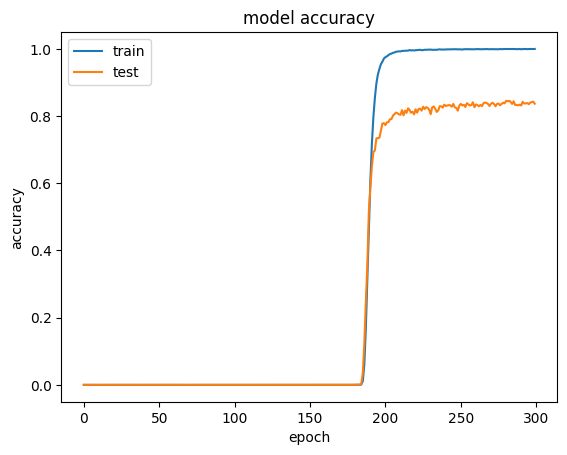

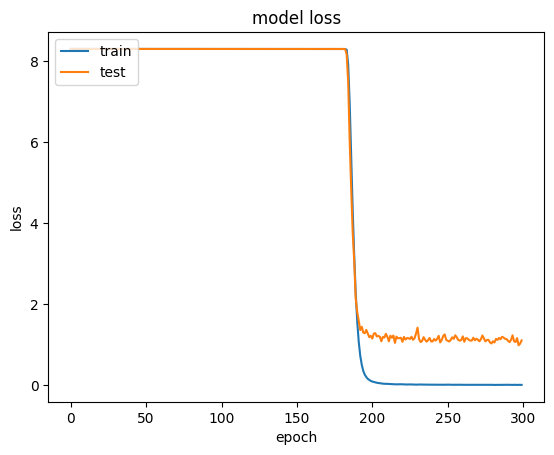

In [15]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')



plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot_CNN.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [ ]:
import os
train_data_dir ='/media/poornima/Local Disk 800GB/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (2)/Train/'
def get_images(image):
    """Load files from train folder"""
    img_dir = train_data_dir+'{}'.format(image)
    images = [image+'/'+im for im in os.listdir(img_dir)]
    return images

In [ ]:
files = []
y_all = []
for image in SIGNATURE_CLASSES:
    image_files = get_images(image)
    files.extend(image_files)
    
    y_image = np.tile(image, len(image_files))
    y_all.extend(y_image)
    print("{0} photos of {1}".format(len(image_files), image))
    
y_all = np.array(y_all)
print(len(files))
print(len(y_all))


In [ ]:
def read_image(src):
    import os
    from scipy import misc
    filepath=src
    im=misc.imread(filepath)
    import scipy.misc  as mc
     
    return mc.imresize(im,(224, 224))

In [ ]:
def read_image(src):
    import os
    #from scipy import misc
    import imageio
    filepath=src
    im = imageio.imread(filepath)
    filepath=src
    #im=misc.imread(filepath)
    import scipy.misc  as mc
    from skimage.transform import resize
    
    #image = data.camera()
    return resize(im, (224, 224,3)) 
    #return mc.imresize(im,(img_width, img_height))

In [ ]:
X_all = np.ndarray((len(files),224, 224 , 3), dtype=np.uint8)
print(X_all.shape)
i=0
for i, im in enumerate(files): 
    X_all[i] = read_image(train_data_dir+im)
    print(X_all[i])

    
   
    if i%1000 == 0: print('Processed {} of {}'.format(i, len(files)))
    break;

print(X_all.shape)

In [ ]:
Test_Dir='/media/poornima/Local Disk 800GB/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (2)/Test1/'

In [ ]:
import os
import pandas as pd
test_files = [im for im in os.listdir(Test_Dir)]
test = np.ndarray((len(test_files), 224, 224,3), dtype=np.uint8)

for i, im in enumerate(test_files): 
    test[i] = read_image(Test_Dir+im)
    
test_preds = model.predict(test, verbose=1)
submission = pd.DataFrame(test_preds, columns=SIGNATURE_CLASSES)
submission.insert(0, 'image', test_files)
submission.head()

submission.to_csv('/media/poornima/Local Disk 800GB/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (2)/Train/Results.csv',index=False)

In [17]:
from tensorflow.keras.models import load_model


# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(validation_generator)
print('test loss, test acc:', results)


# Evaluate on test data
625/625 [==============================] - 55s 87ms/step - loss: 1.1003 - accuracy: 0.8368
test loss, test acc: [1.100305438041687, 0.8367999792098999]


In [ ]:
from tensorflow.keras.models import load_model


# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(validation_generator)
print('test loss, test acc:', results)

In [2]:
# Loading saved model from Drive.
from tensorflow.keras.models import load_model
model = load_model('/media/poornima/Local Disk 800GB/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (2)/signatureRecognition__model.h5')
print("Model is Loaded")
model.summary()

2023-01-17 14:11:10.904522: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-01-17 14:11:10.906022: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-01-17 14:11:10.943856: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-17 14:11:10.944345: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GRID RTX8000-12Q computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 12.00GiB deviceMemoryBandwidth: 625.94GiB/s
2023-01-17 14:11:10.944395: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-01-17 14:11:10.968706: I tensorflow/stream_executor/platform/default/d

Model is Loaded
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 

In [ ]:
from tensorflow.keras.models import load_model


# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(validation_generator)
print('test loss, test acc:', results)


# Evaluate on test data


2023-01-17 14:17:38.927916: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-01-17 14:17:38.930183: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2194845000 Hz
2023-01-17 14:17:40.057171: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-01-17 14:19:38.259263: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2023-01-17 14:25:31.229041: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2023-01-17 14:25:31.270260: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


290/625 [============>.................] - ETA: 50:29 - loss: 1.1078 - accuracy: 0.8355

In [ ]:
import numpy as np
y_pred=model.predict(train_generator)

y_pred=np.argmax(y_pred,axis=1)
print(y_pred)
print("Shape of predicted labels", y_pred.shape)

In [3]:
# image data generation
#train_data_dir ='/home/poornima/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (1)/Train'
train_data_dir ='/media/poornima/Local Disk 800GB/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (2)/Train'
#val_data_dir ='/home/poornima/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (1)/Test'
val_data_dir ='/media/poornima/Local Disk 800GB/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (2)/Test'
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(224, 224), 
                                                    batch_size=32,shuffle=True, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(val_data_dir, target_size=(224, 224), 
                                                    batch_size=32,shuffle=True,class_mode='categorical')

Found 76000 images belonging to 4000 classes.
Found 20000 images belonging to 4000 classes.


In [20]:
# identification of test labels
import numpy as np
batch_size=32
sample_count=20000
features_test = np.zeros(shape=(20000, 4096))  # Must be equal to the output of the convolutional base
labels_test = np.zeros(shape=(20000,4000))
i = 0
for inputs_batch, labels_batch in validation_generator:
  
  labels_test[i * batch_size: (i + 1) * batch_size] = labels_batch
  i += 1
  if i*batch_size  >= sample_count:
    break
print(labels_test.shape)
labels_test=np.argmax(labels_test,axis=1)
print(labels_test)
print("Shape of labels original", labels_test.shape)

(20000, 4000)
[1929 3086 1674 ...  691 3371 3058]
Shape of labels original (20000,)


In [25]:
from sklearn.metrics import classification_report,confusion_matrix

print("Confusion matrix \n=======================")
print(confusion_matrix(y_pred, labels_test))


print("Classification report \n=======================")
print(classification_report(labels_test, y_pred, zero_division=0))

Confusion matrix 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification report 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         5
          14       0.00     

In [19]:
from sklearn import metrics
(precision, recall, f1, support) = metrics.precision_recall_fscore_support(y_pred, labels_test,
                                                        average='weighted', 
                                                        warn_for=tuple())
print(precision)
print(recall)
print(f1)
print(support)

0.00029000000000000006
0.00025
0.0002619172494172494
None


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = model.predict_proba(validation_generator)[:,0]
fpr, tpr, _ = roc_curve(df.y,  y_pred_proba)
auc = roc_auc_score(df.y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc=4)
plt.show()

In [ ]:
# Loading saved model from Drive.
from tensorflow.keras.models import load_model
model = load_model('/media/poornima/Local Disk 800GB/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (2)/Signature_Recognition.h5')
print("Model is Loaded")
model.summary()

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np
from keras.models import load_model
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Click to know Name " )
output = widgets.Output()

model = load_model('/home/poornima/Data/GDPS/Signature_Recognition.h5')
img_path = '/content/drive/My Drive/Dataset2/sign_data.zip (Unzipped Files)/sign_data/11_052.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)
print(block4_pool_features)
label_index=block4_pool_features.argmax()
print(label_index)
def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    print("Signature is of  "  +SIGNATURE_CLASSES[label_index])

button.on_click(on_button_clicked)
display(button, output)

In [24]:
# Extracting Features from classification Layer
from tensorflow.keras.models import Model
layer_name= 'classification_layer'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
print("Imtermediate model is constructed")


Imtermediate model is constructed


In [25]:
# Compilation of intermediate model
intermediate_layer_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
print("Model is Complied")

Model is Complied


In [26]:
# Saving intermediate model
intermediate_layer_model.save('/media/poornima/Local Disk 800GB/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (2)/Inter_Signature_Recognition.h5')
intermediate_layer_model.summary()

print("Saved Intermediate model to disk")

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0     

In [27]:
# Loading Intermediate Model
from tensorflow.keras.models import load_model

model = load_model('/media/poornima/Local Disk 800GB/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (2)/Inter_Signature_Recognition.h5')

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0     

In [37]:
# Training Label feature identification(y_train)
import numpy as np
batch_size=32
sample_count=76000
features = np.zeros(shape=(76000, 4096))  # Must be equal to the output of the convolutional base
labels = np.zeros(shape=(76000, 4000))
i = 0
for inputs_batch, labels_batch in train_generator:
  features_batch = model.predict(inputs_batch)
  features[i * batch_size: (i + 1) * batch_size] = features_batch
  labels[i * batch_size: (i + 1) * batch_size] = labels_batch
  i += 1
  if i*batch_size  >= sample_count:
    break
print(labels.shape)
print(features.shape)


(76000, 4000)
(76000, 4096)


In [31]:
 print(labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [32]:
#identification of training Labels
features_train=features
print(features_train.shape)
labels_train=labels
print(labels_train.shape)
print(labels)
#print(features_train)


(76000, 4096)
(76000, 4000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [33]:
# identification of test labels
import numpy as np
batch_size=32
sample_count=224
features_test = np.zeros(shape=(20000, 4096))  # Must be equal to the output of the convolutional base
labels_test = np.zeros(shape=(20000,4000))
i = 0
for inputs_batch, labels_batch in validation_generator:
  features_batch = model.predict(inputs_batch)
  features_test[i * batch_size: (i + 1) * batch_size] = features_batch
  labels_test[i * batch_size: (i + 1) * batch_size] = labels_batch
  i += 1
  if i*batch_size  >= sample_count:
    break
print(labels_test.shape)
print(features_test.shape)
print(labels_test)

(20000, 4000)
(20000, 4096)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [34]:
# #identification of testing Labels
print(features_test.shape)
#labels_test=np.expand_dims(labels_test, axis=1)
print(labels_test.shape)
print(features_test)

(20000, 4096)
(20000, 4000)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.         13.57441807 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [35]:
print(labels_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [36]:
# SVM
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
print(X_train.shape)
print(labels_train.shape)
X_test = sc.transform(features_test)
from sklearn.utils import check_X_y
X, y = check_X_y(
            X_train, labels_train, multi_output=True)
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X,y)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

(76000, 4096)
(76000, 4000)


ValueError: y should be a 1d array, got an array of shape (76000, 4000) instead.

In [ ]:
# Kernel SVM
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, labels_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

In [ ]:
# Random Forest
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, labels_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
#print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='micro')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='micro')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='micro')
print('F-Measure: %.3f' % (score*100))

In [ ]:
# Decision Tree
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, labels_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
#print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='micro')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='micro')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='micro')
print('F-Measure: %.3f' % (score*100))

In [ ]:
# Naive Bayes
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_X_y
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)
X, y = check_X_y(X_train, labels_train, accept_sparse=False, accept_large_sparse=True, dtype='numeric', order=None, copy=False, force_all_finite=True, ensure_2d=True, allow_nd=False, multi_output=True, ensure_min_samples=1, ensure_min_features=1, y_numeric=True, estimator=None)
# Fitting KernelSVM to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X, y)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
#print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='micro')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='micro')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='micro')
print('F-Measure: %.3f' % (score*100))

In [1]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier =  KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, labels_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
#print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='micro')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='micro')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='micro')
print('F-Measure: %.3f' % (score*100))

NameError: name 'features_train' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)
from sklearn.utils import check_X_y
X, y = check_X_y(
            X_train, labels_train, multi_output=True)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, y)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='micro')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='micro')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='micro')
print('F-Measure: %.3f' % (score*100))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install streamlit

In [7]:
%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.preprocessing import image
import os
from werkzeug.utils import secure_filename
st.set_option('deprecation.showfileUploaderEncoding', False)
from keras.models import load_model
model = load_model('/content/drive/My Drive/Dataset2/sign_data.zip (Unzipped Files)/sign_data/signatureRecognition_VGG16folder_model.h5')
SIGNATURE_CLASSES = ['001', '002', '003','004','006','009','012','013','014','015','016','017','018','019','020','021','022','023','024','025','026','027','028','029','030','031','032','033','034','035','036','037','038','039','040','041','042','043','044','045','046','047','048','049','050','051','052','053','054','055','056','057','058','059','060','061','062','063','064','065','066','067','068','069']
html_temp = """
   <div class="" style="background-color:blue;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">Poornima Univeristy</p></center> 
   <center><p style="font-size:30px;color:white;margin-top:10px;">Deepak Moud, PHD Scholar(2018PUSCEPHDE07061)</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)
  
st.title("""
        Offline Signature Features Identification using deep Convolutional Neural Network
         """
         )
file= st.file_uploader("Please upload signare for Recognition", type=("jpg", "png"))
import cv2
from  PIL import Image, ImageOps
def import_and_predict(image_data, model):
  #img = image.load_img(image_data, target_size=(224, 224))
  #image = image.img_to_array(img)
  #img_reshap= np.expand_dims(image, axis=0)
  #img_reshap = preprocess_input(img_reshap)
  size=(224, 224)
  image=ImageOps.fit(image_data, size, Image.ANTIALIAS)
  img=np.asarray(image)
  img_reshape=np.expand_dims(img, axis=1)
  img_reshape=img[np.newaxis,...]
  block4_pool_features = model.predict(img_reshape)
  label_index=block4_pool_features.argmax()
  print(block4_pool_features)
  result=SIGNATURE_CLASSES[label_index]
  return result
if file is None:
  st.header("Please upload an signature Image")
else:
  image=Image.open(file)
  #imagefile.save('uploads/' + secure_filename(imagefile.filename))
  # Save the file to ./uploads        
  #file_path = os.path.join('/content','uploads', secure_filename(f.filename))
  st.image(image, use_column_width=True)
  
if st.button("Predict-VGG16"):
  result=import_and_predict(image,model)
  st.success('VGG16 Model has predicted signature is of user  {}'.format(result))
if st.button("About"):
  st.text(" Deepak Moud")
  st.text("Under the Guidance of Dr. Rekha Jain")
html_temp = """
   <div class="" style="background-color:orange;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:20px;color:white;margin-top:10px;">Objective 3: Evalution of pre trained Model for signature recognition</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)

Writing app.py


In [8]:
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 745.3/745.3 kB 3.2 MB/s eta 0:00:003.3 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.8/661.8 kB 18.2 MB/s eta 0:00:00m eta 0:00:01
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=18986 sha256=4971966c46e9847c975e76a3f6c247b1285ea3fe22abd7c19f00dd0547571f5f
  Stored in directory: /home/poornima/.cache/pip/wheels/a8/05/30/c9d9f2417546c7a7c329f5bba09e2cfba9991c030ad8bfb043
Successfully built pyngrok


In [9]:
!ngrok authtoken 1oEm0wopEJyjrT38ULluwUKK5fq_7ai4ZocZJ2YuFuoiJfoMh

Authtoken saved to configuration file: /home/poornima/.ngrok2/ngrok.yml                             


In [11]:
!nohup streamlit run  app.py &

OSError: Background processes not supported.

In [12]:
from pyngrok import ngrok
url=ngrok.connect(port=8501)
url

<NgrokTunnel: "http://2a58-223-26-31-186.ngrok.io" -> "http://localhost:80">

In [13]:
 !streamlit run --server.port 80 app.py

/bin/bash: line 1: streamlit: command not found


In [14]:
!kill ngrok()

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `kill ngrok()'
